<a href="https://colab.research.google.com/github/mydevco/python-desktop-reference/blob/main/SKLearn_Example_PCA_LDA_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo

In [ ]:
#Using matplotlip and SciKit learn library to apply PCA and LDA on IRIS dataset
import matplotlib.pyplot as plt
from sklearn import datasets
#Panda is a data prtocessing library for Python.
import pandas as pd

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names
display(pd.DataFrame(data=iris.data, columns=iris.feature_names))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
#Import standard scaler from sklearn to scale the IRIS data
from sklearn.preprocessing import StandardScaler

print(X.shape)

# Scale the data using sklearn standard scaler fit_transform method
scaled_features = StandardScaler().fit_transform(X)
scaled_features[:5]

(150, 4)


array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

#Visualization of PCA in three dimnension

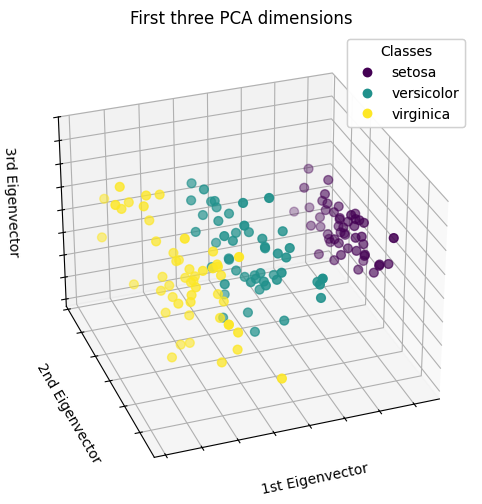

In [ ]:
#Import matplot 3D and PCA packages
import mpl_toolkits.mplot3d  #

from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)
#Create PCA to transform
X_reduced = PCA(n_components=3).fit_transform(iris.data)

#Use scalers to reduce
scatter = ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=iris.target,
    s=40,
)
#Define plot axis and legend
ax.set(
    title="First three PCA dimensions",
    xlabel="1st Eigenvector",
    ylabel="2nd Eigenvector",
    zlabel="3rd Eigenvector",
)
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

# Add a legend
legend1 = ax.legend(
    scatter.legend_elements()[0],
    iris.target_names.tolist(),
    loc="upper right",
    title="Classes",
)
ax.add_artist(legend1)

plt.show()

PCA with 3 components
Apply dimensionality reduction on the dataset using PCA to make the prediction of the relative target values.
Extract the three main components from the dataset, and delete the least important feature for classification.
Visualize the data on the graphs' spatial arrangement.


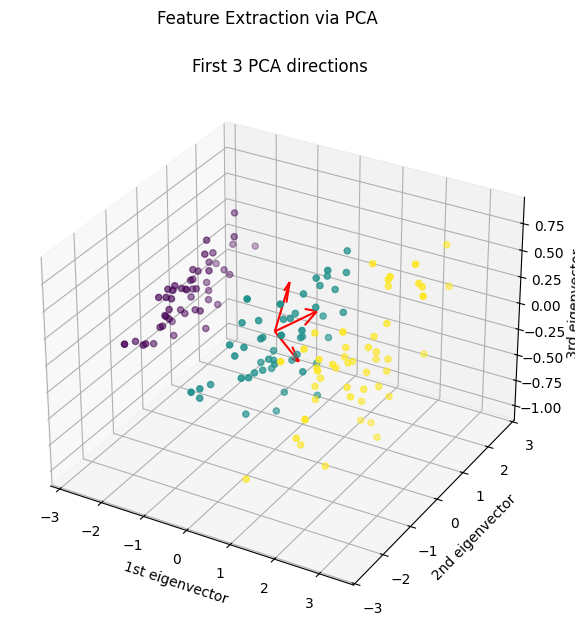

In [ ]:
#We will use Numpy Library for array and python data structures
import numpy as np
# Plot the training points
def plot_pca_3(data, figsize, subplot, title):
  # Data visualization based on the 3 main components
  figure = plt.figure(1, figsize=figsize)
  figure.suptitle("Feature Extraction via PCA")
  ax = figure.add_subplot(subplot, projection="3d")
  ax.scatter(data.T[0], data.T[1], data.T[2], c=y)
  ax.quiver(np.mean(data.T[0]), np.mean(data.T[1]), np.mean(data.T[2]), pca.components_.T[0], pca.components_.T[1], pca.components_.T[2], color="red")
  ax.set_title(title)
  ax.set_xlabel("1st eigenvector")
  ax.set_ylabel("2nd eigenvector")
  ax.set_zlabel("3rd eigenvector")

# Plot the first three PCA dimensions
pca = PCA(n_components = 3)
pc3 = pca.fit_transform(scaled_features)
plot_pca_3(pc3, (10, 7), 111, "First 3 PCA directions")

plt.show()

Three main components are indicated by the three vectors in red above. Select two components starting from the original normalized dataset, and two components starting from the three previously extracted, to evaluate which is better.

/tmp/ipython-input-3874656177.py:6: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  figure = plt.figure(1, figsize=figsize)


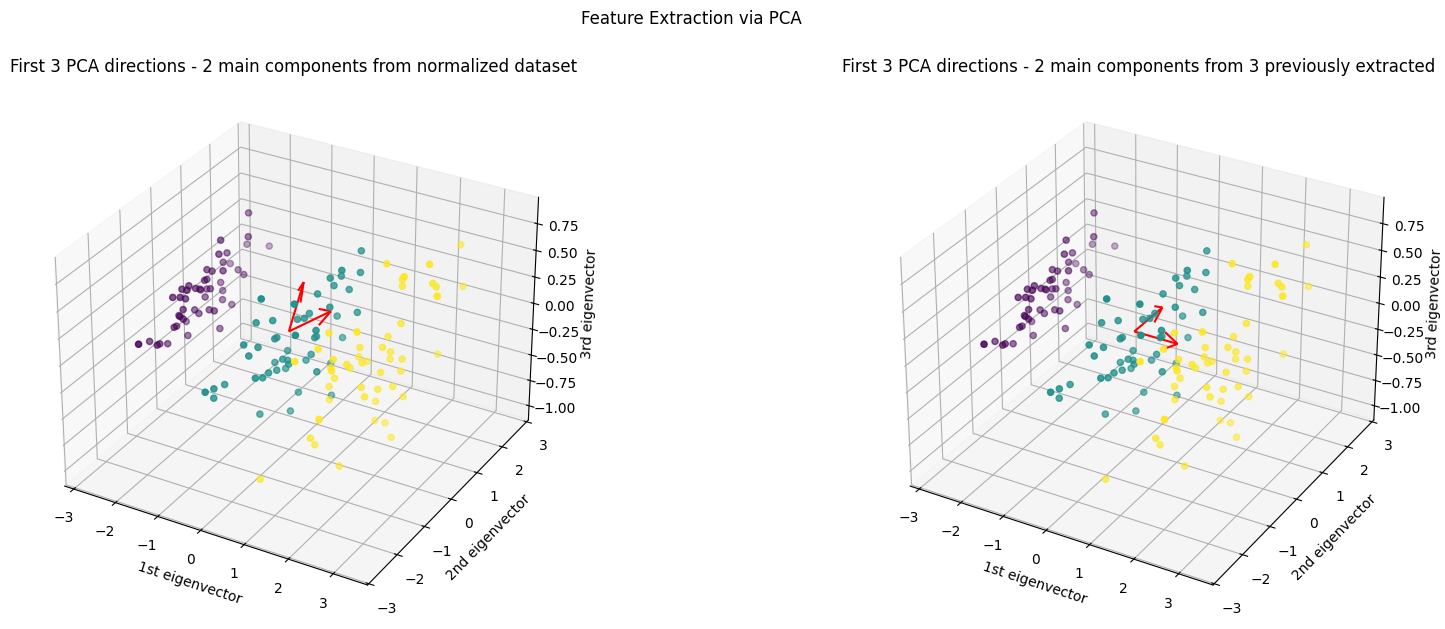

In [ ]:
# Data visualization based on the 3 main components
# and the directions of the 2 main components extracted from the normalized dataset
pca = PCA(n_components = 2)
pc2 = pca.fit_transform(scaled_features)
plot_pca_3(pc3, (20, 7), 121, "First 3 PCA directions - 2 main components from normalized dataset")

# Data visualization based on the 3 main components
# and the directions of the 2 main components extracted from the 3 previously extracted
pca = PCA(n_components = 2)
pc2_from3 = pca.fit_transform(pc3)
plot_pca_3(pc3, (20, 7), 122, "First 3 PCA directions - 2 main components from 3 previously extracted")

plt.show()

##PCA with 2 components

/tmp/ipython-input-3759181382.py:4: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  figure = plt.figure(1, figsize=(20, 7))


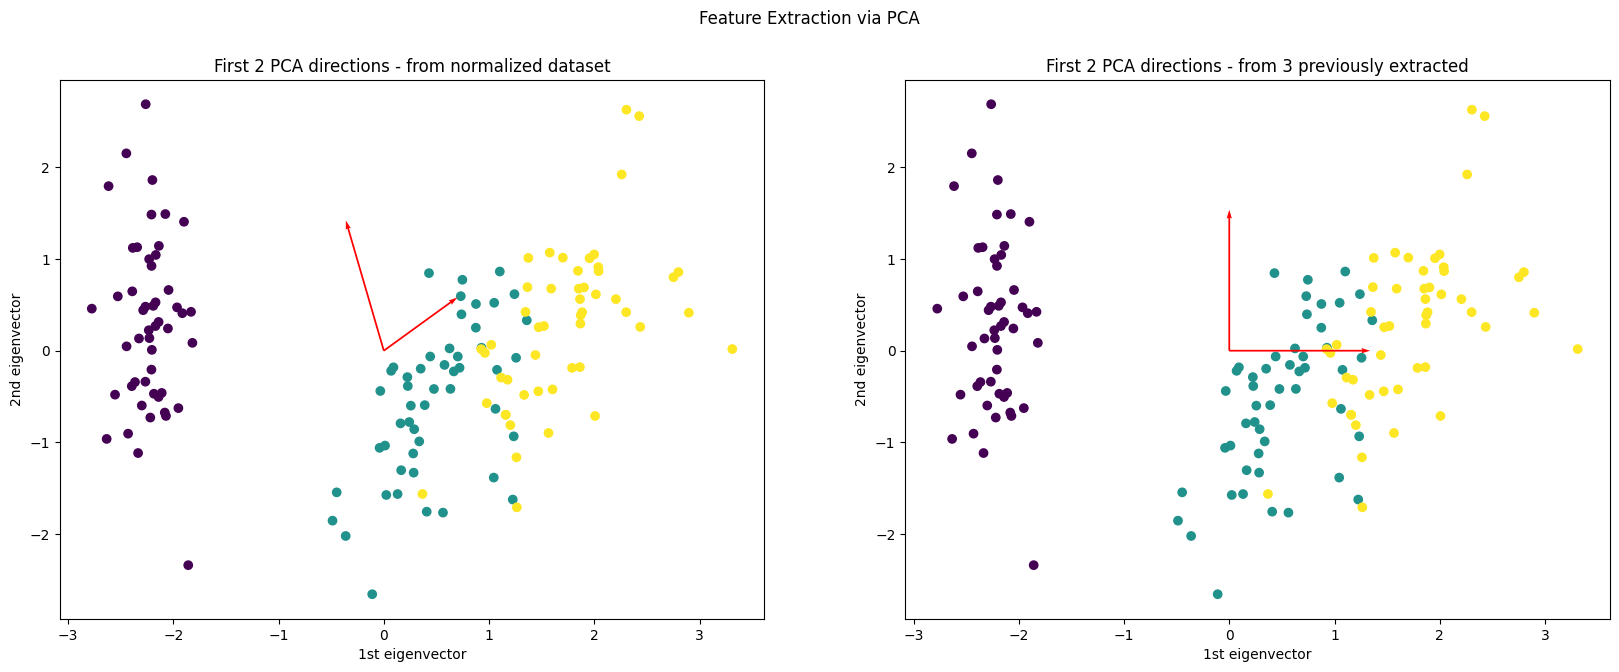

In [ ]:
# Plot the training points
def plot_pca_2(data, subplot, title):
  # Data visualization based on the 2 main components
  figure = plt.figure(1, figsize=(20, 7))
  figure.suptitle("Feature Extraction via PCA")
  ax = figure.add_subplot(subplot)
  ax.scatter(data.T[0], data.T[1], c=y)
  ax.quiver(np.mean(data.T[0]), np.mean(data.T[1]), pca.components_[0][0], pca.components_[1][0], color="red", scale=5, width=0.0025)
  ax.quiver(np.mean(data.T[0]), np.mean(data.T[1]), pca.components_[0][1], pca.components_[1][1], color="red", scale=5, width=0.0025)
  ax.set_title(title)
  ax.set_xlabel("1st eigenvector")
  ax.set_ylabel("2nd eigenvector")

# Extraction of the 2 main components starting from the normalized dataset
pca = PCA(n_components = 2)
pc2 = pca.fit_transform(scaled_features)
plot_pca_2(pc2, 121, "First 2 PCA directions - from normalized dataset")

# Extraction of the 2 main components starting from the 3 previously extracted
pca = PCA(n_components = 2)
pc2_from3 = pca.fit_transform(pc3)
plot_pca_2(pc2_from3, 122, "First 2 PCA directions - from 3 previously extracted")

plt.show()

##PCA with 1 component
 Extract the single main component starting from the original normalized and then from the two previously extracted components.

/tmp/ipython-input-2228736380.py:4: UserWarning: Ignoring specified arguments in this call because figure with num: 1 already exists
  figure = plt.figure(1, figsize=(20, 7))


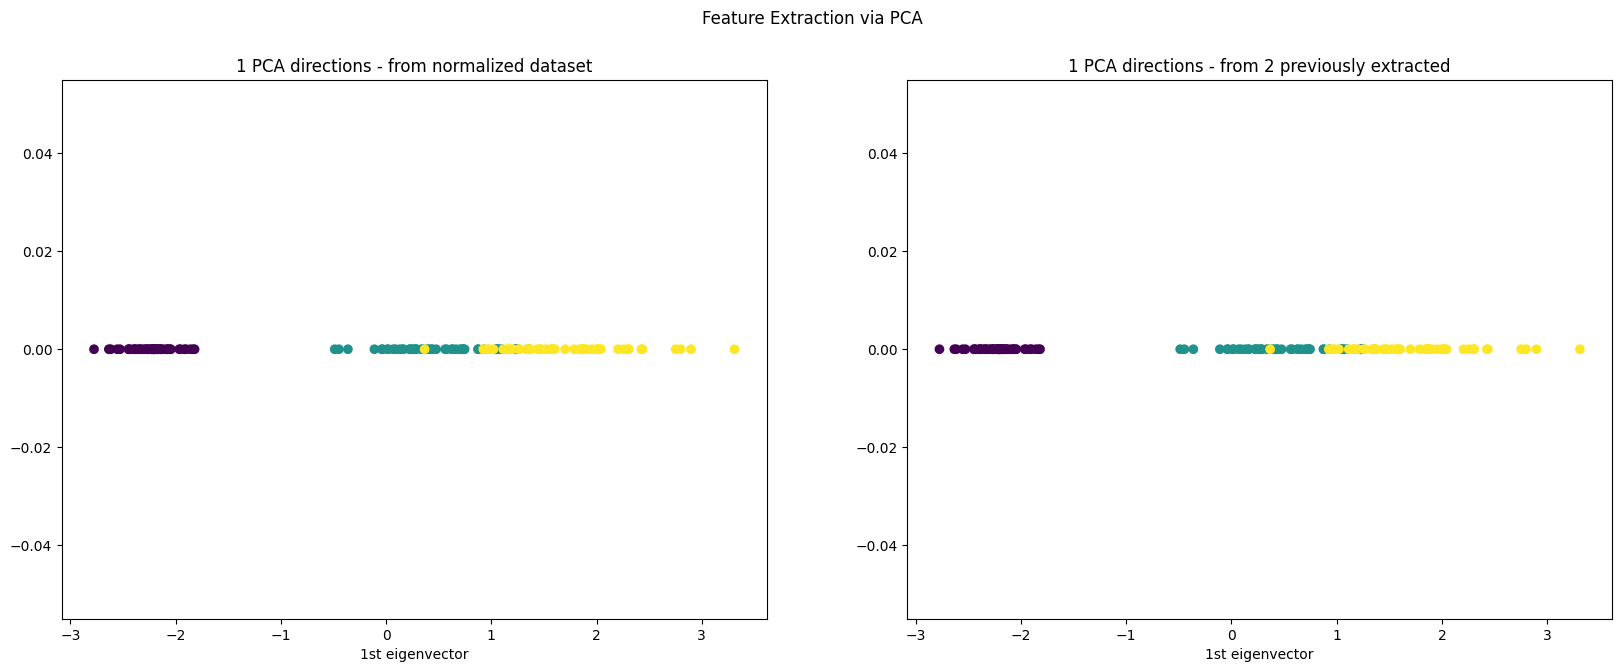

In [ ]:
# Plot the training points
def plot_pca_1(data, subplot, title):
  # Data visualization based on the 1 main component
  figure = plt.figure(1, figsize=(20, 7))
  figure.suptitle("Feature Extraction via PCA")
  ax = figure.add_subplot(subplot)
  ax.scatter(data.T[0], [0]*len(data.T[0]), c=y)
  #ax.quiver(np.mean(data.T[0]),  pca.components_[0][0], color="red", scale=5, width=0.0025)
  ax.set_title(title)
  ax.set_xlabel("1st eigenvector")

# Extraction of the 1 main component starting from the normalized dataset
pca = PCA(n_components = 1)
pc1 = pca.fit_transform(scaled_features)
plot_pca_1(pc1, 121, "1 PCA directions - from normalized dataset")

# Extraction of the 1 main component starting from the 2 previously extracted
pca = PCA(n_components = 1)
pc1_from2 = pca.fit_transform(pc2_from3)
plot_pca_1(pc1_from2, 122, "1 PCA directions - from 2 previously extracted")

plt.show()

## Linear Discriminant Analysis (LDA):
LDA (Linear Discriminant Analysis) is another extraction method.  It is more computationally efficient because it reduces the degree of overfitting. Like PCA, LDA lowers the dimension using the new axis. Here, we maximize the distance between the mean values of the classes and minimize the variance of the data points within classes. All data points should fall in their correct classes. LDA is a supervised machine learning technique. Linear Discriminant Analysis (LDA) tries to find attributes with the most variance among the classes.

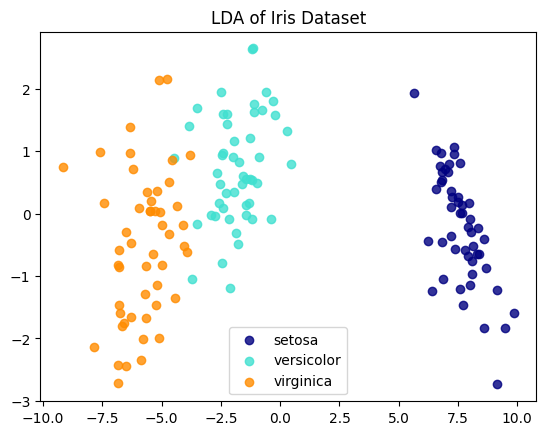

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name)

plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of Iris Dataset")
plt.show()

#Compare PCA and LDA

We can compare both techniques below using Matplotlib side by side.

explained variance ratio (first two components): [0.92461872 0.05306648]


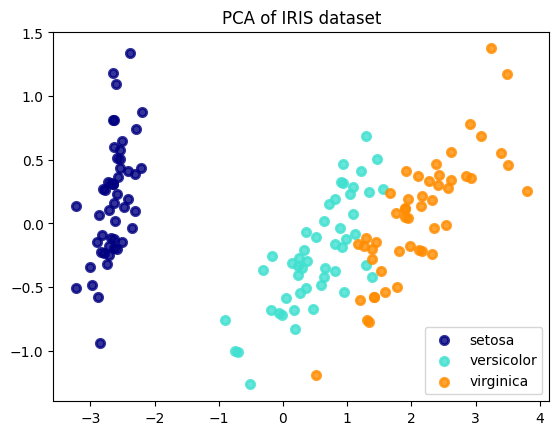

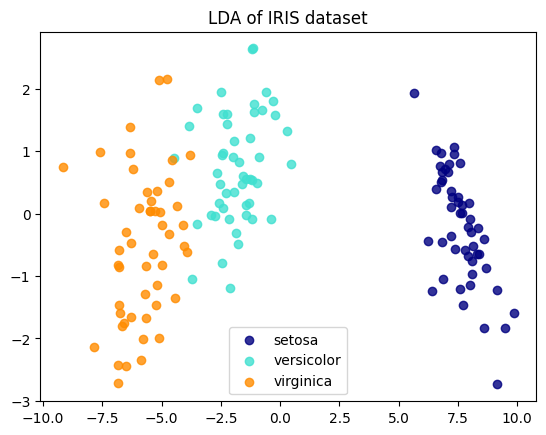

In [ ]:
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)

# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

plt.figure()
colors = ["navy", "turquoise", "darkorange"]
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=0.8, lw=lw, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("PCA of IRIS dataset")

plt.figure()
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(
        X_r2[y == i, 0], X_r2[y == i, 1], alpha=0.8, color=color, label=target_name
    )
plt.legend(loc="best", shadow=False, scatterpoints=1)
plt.title("LDA of IRIS dataset")

plt.show()

